In [2]:
import pandas as pd
import numpy as np
import sklearn as sk
import openpyxl
import statsmodels.graphics.api as smg
import matplotlib.pyplot as plt 
import seaborn as sns
import shap
from sklearn.ensemble import RandomForestRegressor
from pandas.plotting import scatter_matrix
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
from sklearn.linear_model import Ridge
from sklearn.model_selection import ShuffleSplit
from sklearn.datasets import make_regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso
from sklearn.model_selection import validation_curve
from sklearn.datasets import load_digits
from sklearn.svm import SVC
import warnings
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits

In [3]:
datos = pd.read_excel('/home/erick_castro/Documentos/Inteligencia/Datos.xlsx', sheet_name = "Hoja1")
datos = pd.DataFrame(datos)
datos = datos.dropna(axis = 0, how ="any")
datos.head(10)

,Evento,C1,Duración_(min)_pl,Intensidad_media pl,Intensidad_máxima_pl,Intensidad_continuap_pl,C_(mm_est,Duración_(min)_esta,Intensidad_media_est,Intensidad_máxima_est,...,Hs_80,Hs_100,Lluvia antecedent_24 horas_pluv,Lluvia antecedent_24_horas_esta,Lluvia antecedent_48_horas_pluv,Lluvia_antecedent_48_horas_est,Qmax,Trespuesta_(min)_plub,Trespuesta_est,Q_inicial
0,Evento 1,16.382445,55,17.871758,399.148547,27.132184,12.66,55,13.810909,93.850000,...,0.535343,0.503777,16.382445,13.0,19.460113,13.4,17.246332,105.0,100.0,6.854821
1,Evento 2,15.827108,35,27.132184,312.330000,27.132184,14.80,40,22.200000,84.375000,...,0.540182,0.506062,56.089048,50.2,56.089048,50.2,20.280403,115.0,125.0,7.080917
2,Evento 3,54.700705,1125,2.917371,138.830000,11.285883,47.00,1125,2.506667,109.375000,...,0.552282,0.514057,56.089048,50.2,56.089048,50.2,30.667560,105.0,105.0,7.092906
3,Evento 4,13.883428,105,7.933387,86.771423,7.933387,12.40,95,7.831579,28.125000,...,0.572852,0.534618,1.000000,1.0,1.000000,1.0,15.663358,70.0,65.0,9.328517
4,Evento 5,5.553371,60,5.553371,104.125708,8.554286,5.00,50,6.000000,21.875000,...,0.598261,0.557462,23.324159,18.2,60.809413,50.8,16.910000,75.0,80.0,13.085455
5,Evento 6,24.434833,340,4.312029,173.542846,15.202500,23.40,400,3.510000,44.791667,...,0.581322,0.542613,3.332023,2.8,3.332023,2.8,23.893522,320.0,325.0,11.809956
6,Evento 7,3.054354,55,3.332023,69.417139,6.000000,2.80,65,2.584615,11.458333,...,0.598261,0.550609,26.656181,24.2,29.988204,27.0,14.280000,75.0,80.0,12.886883
7,Evento 8,19.436799,85,13.720093,312.370000,27.600000,15.40,45,20.533333,66.666650,...,0.594631,0.551751,20.269804,19.2,46.925986,43.4,36.390000,55.0,60.0,13.014717
8,Evento 9,5.275703,25,12.661686,69.417139,12.661686,5.00,35,8.571429,25.000000,...,0.600681,0.560889,9.718399,9.0,29.988204,28.2,16.530000,45.0,50.0,13.709470
9,Evento 10,3.609691,50,4.331629,34.708569,4.980000,3.40,65,3.138462,8.333333,...,0.601891,0.560889,9.718399,9.0,29.988204,28.2,17.006422,80.0,85.0,14.355421


In [4]:
logqmax = np.log(datos[["Qmax"]])
logqmax.head()

,Qmax
0,2.847599
1,3.009655
2,3.423205
3,2.751324
4,2.827905


In [5]:
log_expl_var = pd.DataFrame(np.log(datos[["C_(mm_est", 'Lluvia_antecedent_48_horas_est']]))
log_expl_var.head()

,C_(mm_est,Lluvia_antecedent_48_horas_est
0,2.538447,2.595255
1,2.694627,3.916015
2,3.850148,3.916015
3,2.517696,0.000000
4,1.609438,3.927896


In [6]:
train_sizes = [10, 50, 70, 90, 100,125,150,170,190,200]

In [7]:
features = ['C_(mm_est', 'Lluvia_antecedent_48_horas_est']
target = 'Qmax'
train_sizes, train_scores, validation_scores = learning_curve(
estimator = RandomForestRegressor(),
X = log_expl_var[features],
y = logqmax[target], train_sizes = train_sizes, cv = 100,
scoring = 'neg_mean_squared_error')

In [8]:
print('Training scores:\n\n', train_scores)
print('\n', '-' * 70) # separator to make the output easy to read
print('\nValidation scores:\n\n', validation_scores)

Training scores:

 [[-0.0126006  -0.01705444 -0.01101524 -0.01385988 -0.00887814 -0.00692323
  -0.00644946 -0.00822908 -0.00826095 -0.00877579 -0.00733987 -0.00667928
  -0.00717362 -0.00774218 -0.00785176 -0.0077895  -0.00794359 -0.00594193
  -0.00804781 -0.00787729 -0.00824218 -0.01039026 -0.00711732 -0.00722453
  -0.00902591 -0.00742413 -0.00713147 -0.0077071  -0.00959694 -0.00641487
  -0.00659672 -0.00733928 -0.00661973 -0.00745215 -0.00762556 -0.00943672
  -0.0063225  -0.00696388 -0.00902364 -0.01016818 -0.00632888 -0.00626014
  -0.00727    -0.00661298 -0.00749922 -0.00577295 -0.00570247 -0.00737719
  -0.00887202 -0.00735224 -0.0084068  -0.00745703 -0.00798125 -0.00852716
  -0.01096281 -0.00692541 -0.00695537 -0.00683951 -0.00709415 -0.00579506
  -0.00799528 -0.00636761 -0.00885571 -0.0071679  -0.01017372 -0.00946255
  -0.00795286 -0.00948283 -0.00630872 -0.00633254 -0.00849738 -0.00779294
  -0.0062494  -0.00713742 -0.00727982 -0.00940969 -0.00695092 -0.00659837
  -0.00922118 -0.00

In [9]:
train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean(axis = 1)
print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
print('\n', '-' * 20) # separator
print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))

Mean training scores

 10     0.007938
50     0.013141
70     0.012909
90     0.012069
100    0.012088
125    0.014656
150    0.016948
170    0.018470
190    0.018856
200    0.019080
dtype: float64

 --------------------

Mean validation scores

 10     0.268308
50     0.160403
70     0.149247
90     0.157374
100    0.155240
125    0.143575
150    0.134033
170    0.134104
190    0.135858
200    0.140880
dtype: float64


The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.


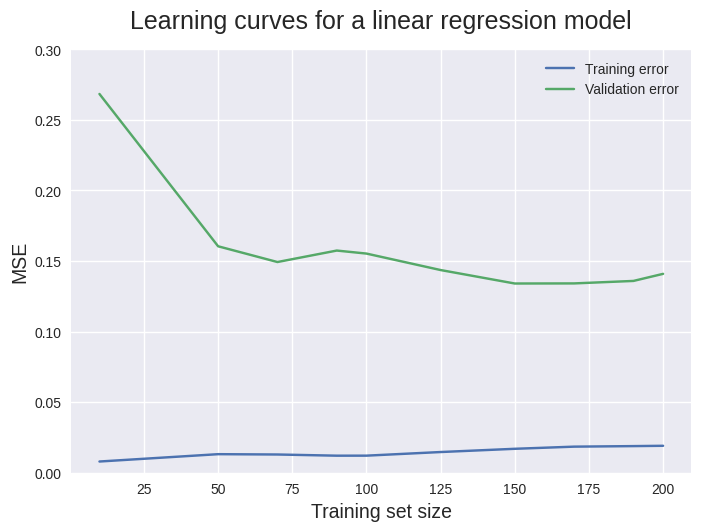

In [10]:
plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('MSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a linear regression model', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0,0.3)
plt.show()

/home/erick_castro/anaconda3/envs/inteligencia/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/erick_castro/anaconda3/envs/inteligencia/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/erick_castro/anaconda3/envs/inteligencia/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/erick_castro/anaconda3/en

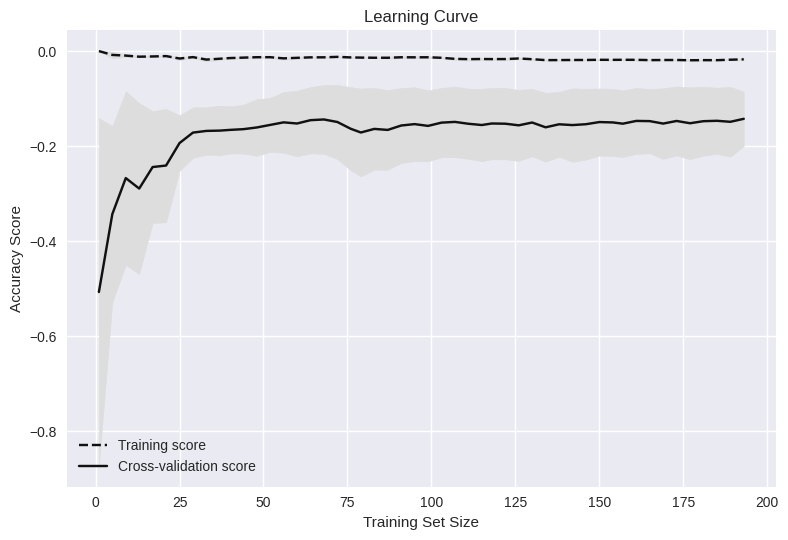

In [11]:
train_sizes, train_scores, test_scores = learning_curve(RandomForestRegressor(), log_expl_var , logqmax,cv=10, scoring='neg_mean_squared_error', n_jobs=-1,train_sizes=np.linspace(0.01, 1.0, 50))

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()

In [12]:
kfold = ShuffleSplit(n_splits=30, test_size=0.3, random_state=1)
model = RandomForestRegressor()
results = cross_val_score(model, log_expl_var ,logqmax, cv=kfold, scoring='r2')
print(results)
print(results.mean())
print(results.std())

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the

[0.68196719 0.71546401 0.75189674 0.72977603 0.76897608 0.7334829
 0.7695071  0.57365992 0.76692968 0.74449307 0.74056905 0.76028261
 0.72927107 0.67122757 0.79016846 0.62674465 0.72468958 0.7773186
 0.67203499 0.61574104 0.67719618 0.74832255 0.68434631 0.67956189
 0.81812323 0.76291723 0.72044179 0.73283722 0.61077228 0.66775758]
0.7148825531252435
0.05700524115988771


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


In [14]:
X_train,X_test, y_train,y_test = train_test_split(log_expl_var,logqmax, random_state=1)
lr=LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [15]:
train_score=lr.score(X_train, y_train)
test_score=lr.score(X_test, y_test)
print('Train score:', train_score)
print('Test score:', test_score)

Train score: 0.6496939232974134
Test score: 0.6714112058948771


In [16]:
lc = learning_curve(RandomForestRegressor(),X_train,y_train,cv=5)
samples, train, test = lc[0], lc[1], lc[2]
lc

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the

(array([ 12,  41,  70,  99, 128]),
 array([[0.8649186 , 0.81744699, 0.81012951, 0.8215301 , 0.83098239],
        [0.94255556, 0.95147029, 0.94225135, 0.9402659 , 0.94377709],
        [0.93445687, 0.94160838, 0.94916778, 0.94841016, 0.9507051 ],
        [0.95512072, 0.95281376, 0.96282332, 0.94876637, 0.93995955],
        [0.95654604, 0.95943709, 0.96540398, 0.95041597, 0.95637485]]),
 array([[ 0.09449986,  0.34023981, -0.48027013,  0.4272719 ,  0.40610765],
        [ 0.65180044,  0.23390605,  0.2217584 ,  0.69318129,  0.7765927 ],
        [ 0.70713897,  0.34701512,  0.29387745,  0.78002715,  0.68828031],
        [ 0.72987614,  0.53539923,  0.27250754,  0.8026347 ,  0.7451029 ],
        [ 0.73638091,  0.55315103,  0.27428957,  0.78475236,  0.75405119]]))

(0.0, 1.0)

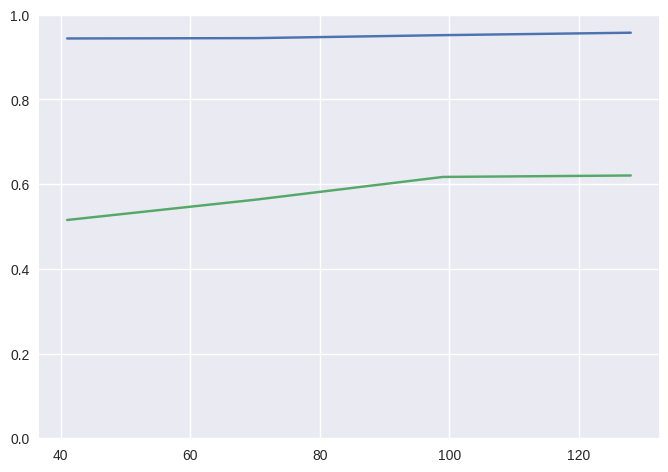

In [17]:
plt.plot(samples[1:],np.mean(train,axis=1)[1:])
plt.plot(samples[1:],np.mean(test,axis=1)[1:]);
plt.ylim(0,1)